In [ ]:
import pandas as pd
bakeryData = pd.read_csv('/content/Bakery sales.csv')

print("Bakery Data Columns")
print(bakeryData.columns)

#Group by Ticket Number (Two products were bought in the same transaction if the rows for both products include the same value for ticket number)
bakeryData = bakeryData.drop(columns = ['Unnamed: 0', 'date', 'time', 'Quantity', 'unit_price'], axis = 1)

ticketNumber = bakeryData['ticket_number']
#Note, "article" is the French word for item
bakeryItems = bakeryData['article']

ticketItemGroupings = {}

for i in range(0, len(ticketNumber)):
    curr = ticketNumber[i]
    if curr in ticketItemGroupings:
        l = ticketItemGroupings[curr]
        l.append(bakeryItems[i])
        ticketItemGroupings[curr] = l
    else:
        ticketItemGroupings[curr] = [bakeryItems[i]]

result = pd.DataFrame()

print("Number of Ticket-Item Groupings:", len(ticketItemGroupings.keys()))
for key in ticketItemGroupings.keys():
    ticketNum = key
    items = ticketItemGroupings[key]
    row = pd.Series([ticketNum, items], index=["Ticket Number", "Items Purchased"])
    result = pd.concat([result, row.to_frame().T], ignore_index=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Bakery Data Columns
Index(['Unnamed: 0', 'date', 'time', 'ticket_number', 'article', 'Quantity',
       'unit_price'],
      dtype='object')
Number of Ticket-Item Groupings: 136451


In [ ]:
result

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Ticket Number,Items Purchased
0,150040.0,"[BAGUETTE, PAIN AU CHOCOLAT]"
1,150041.0,"[PAIN AU CHOCOLAT, PAIN]"
2,150042.0,[TRADITIONAL BAGUETTE]
3,150043.0,"[BAGUETTE, CROISSANT]"
4,150044.0,[BANETTE]
...,...,...
136446,288908.0,[CEREAL BAGUETTE]
136447,288910.0,[TRADITIONAL BAGUETTE]
136448,288911.0,"[CAMPAGNE, TRADITIONAL BAGUETTE, COUPE, BOULE ..."
136449,288912.0,[TRADITIONAL BAGUETTE]


In [ ]:
# Convert 'Items Purchased' to list of lists
transactions = result['Items Purchased'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# One-hot encoding
encoder = TransactionEncoder()
encoder.fit(transactions)
one_hot_encoding = encoder.transform(transactions)
one_hot_encoding = pd.DataFrame(data=one_hot_encoding, columns=encoder.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for association rules
def scatter_plot(rules):
  plt.scatter(rules['support'], rules['confidence'], c=rules['lift'])

  plt.title('Association Rules: Support vs Confidence vs Lift')
  plt.xlabel('Support')
  plt.ylabel('Confidence')
  plt.colorbar(label='lift')

  for i, row in rules.iterrows():
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        label = f'({antecedents} -> {consequents})'
        plt.annotate(label, (row['support'], row['confidence']), fontsize=8)

  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def directed_graph(rules):
  G = nx.DiGraph()

  for index, row in rules.iterrows():
      G.add_edge(row['antecedents'], row['consequents'], weight=row['confidence'])

  pos = nx.spring_layout(G)
  plt.figure(figsize=(20, 12))
  nx.draw(G, pos, with_labels=True, arrows=True)
  edge_labels = nx.get_edge_attributes(G, 'weight')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

  plt.title("Association Rules: Directed Graph")
  plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from mlxtend.frequent_patterns import apriori

# Apriori algorithm (example 1)
print("Example 1: Apriori Algorithm")
print('Let minsup = 1%')
frequent_itemset1 = apriori(one_hot_encoding, min_support=0.01, use_colnames=True)
print("Length of total frequent itemsets:", len(frequent_itemset1))
frequent_itemset1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Example 1: Apriori Algorithm
Let minsup = 1%
Length of total frequent itemsets: 49


,support,itemsets
0,0.111930,(BAGUETTE)
1,0.010993,(BAGUETTE GRAINE)
2,0.110714,(BANETTE)
3,0.020630,(BANETTINE)
4,0.010758,(BOISSON 33CL)
5,0.019677,(BOULE 200G)
6,0.029916,(BOULE 400G)
7,0.012136,(BRIOCHE)
8,0.010473,(CAFE OU EAU)
9,0.028523,(CAMPAGNE)


In [ ]:
from mlxtend.frequent_patterns import association_rules

# Associations Rules (example 1)
print("Example 1: Association Rules")
print('Let minconf = 60%')
rules1 = association_rules(frequent_itemset1, metric="confidence", min_threshold=0.6)
print("Length of total association rules:", len(rules1))
rules1

Example 1: Association Rules
Let minconf = 60%
Length of total association rules: 6


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BOULE 200G),(COUPE),0.019677,0.142351,0.017479,0.888268,6.239965,0.014678,7.675954,0.856598
1,(BOULE 400G),(COUPE),0.029916,0.142351,0.023759,0.794219,5.579279,0.019501,4.167763,0.846076
2,(CAMPAGNE),(COUPE),0.028523,0.142351,0.022807,0.799589,5.617005,0.018746,4.279446,0.846103
3,(COMPLET),(COUPE),0.022961,0.142351,0.016958,0.738589,5.188490,0.013690,3.280846,0.826237
4,(MOISSON),(COUPE),0.022682,0.142351,0.016182,0.713409,5.011601,0.012953,2.992584,0.819041
5,(VIK BREAD),(COUPE),0.022909,0.142351,0.016812,0.733845,5.155164,0.013551,3.222367,0.824918


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


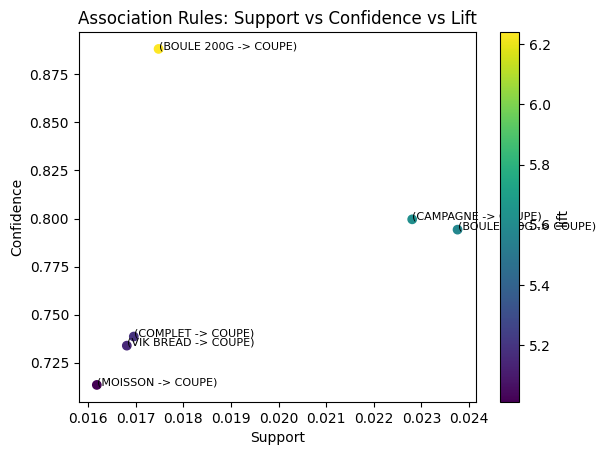

In [ ]:
# Scatter plot for example 1 association rules
scatter_plot(rules1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


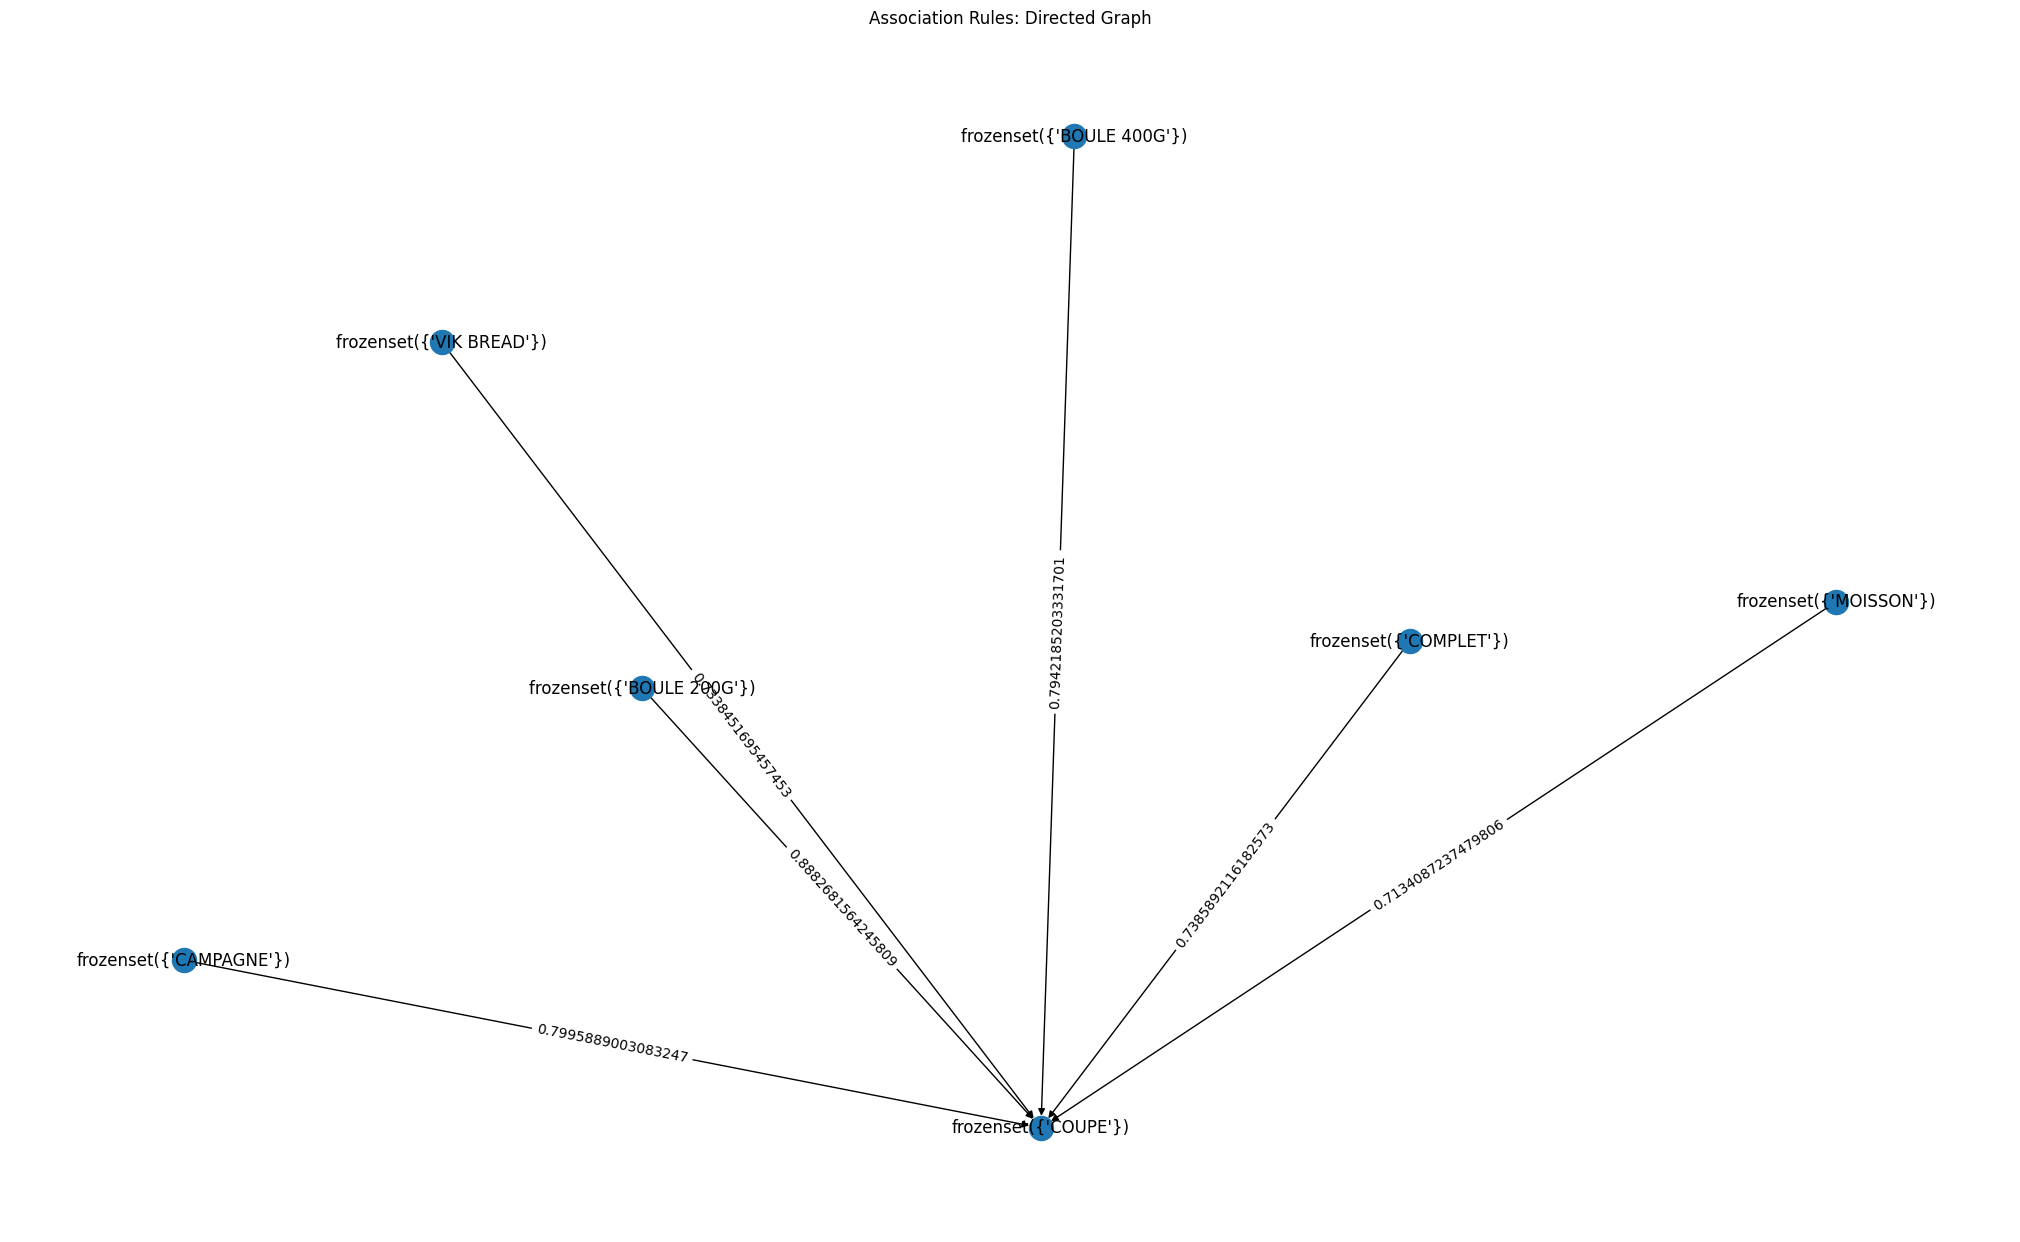

In [ ]:
# Directed graph for example 1 association rules
directed_graph(rules1)

In [ ]:
# Apriori algorithm (example 2)
print("Example 2: Apriori Algorithm")
print('Let minsup = 1.5%')
frequent_itemset2 = apriori(one_hot_encoding, min_support=0.015, use_colnames=True)
print("Length of total frequent itemsets:", len(frequent_itemset2))
frequent_itemset2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Example 2: Apriori Algorithm
Let minsup = 1.5%
Length of total frequent itemsets: 32


,support,itemsets
0,0.111930,(BAGUETTE)
1,0.110714,(BANETTE)
2,0.020630,(BANETTINE)
3,0.019677,(BOULE 200G)
4,0.029916,(BOULE 400G)
5,0.028523,(CAMPAGNE)
6,0.036277,(CEREAL BAGUETTE)
7,0.022961,(COMPLET)
8,0.142351,(COUPE)
9,0.083884,(CROISSANT)


In [ ]:
# Associations Rules (example 2)
print("Example 2: Association Rules")
print('Let minconf = 50%')
rules2 = association_rules(frequent_itemset1, metric="confidence", min_threshold=0.5)
print("Length of total association rules:", len(rules2))
rules2

Example 2: Association Rules
Let minconf = 50%
Length of total association rules: 10


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BOULE 200G),(COUPE),0.019677,0.142351,0.017479,0.888268,6.239965,0.014678,7.675954,0.856598
1,(BOULE 400G),(COUPE),0.029916,0.142351,0.023759,0.794219,5.579279,0.019501,4.167763,0.846076
2,(CAMPAGNE),(COUPE),0.028523,0.142351,0.022807,0.799589,5.617005,0.018746,4.279446,0.846103
3,(COMPLET),(COUPE),0.022961,0.142351,0.016958,0.738589,5.188490,0.013690,3.280846,0.826237
4,(MOISSON),(COUPE),0.022682,0.142351,0.016182,0.713409,5.011601,0.012953,2.992584,0.819041
5,(SPECIAL BREAD),(COUPE),0.037977,0.142351,0.022345,0.588383,4.133311,0.016939,2.083607,0.787989
6,(VIK BREAD),(COUPE),0.022909,0.142351,0.016812,0.733845,5.155164,0.013551,3.222367,0.824918
7,(PAIN AU CHOCOLAT),(CROISSANT),0.077163,0.083884,0.039531,0.512299,6.107265,0.033058,1.878440,0.906185
8,(VIK BREAD),(TRADITIONAL BAGUETTE),0.022909,0.494940,0.011718,0.511516,1.033492,0.000380,1.033935,0.033167
9,"(PAIN AU CHOCOLAT, TRADITIONAL BAGUETTE)",(CROISSANT),0.030817,0.083884,0.016621,0.539358,6.429838,0.014036,1.988781,0.871327


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


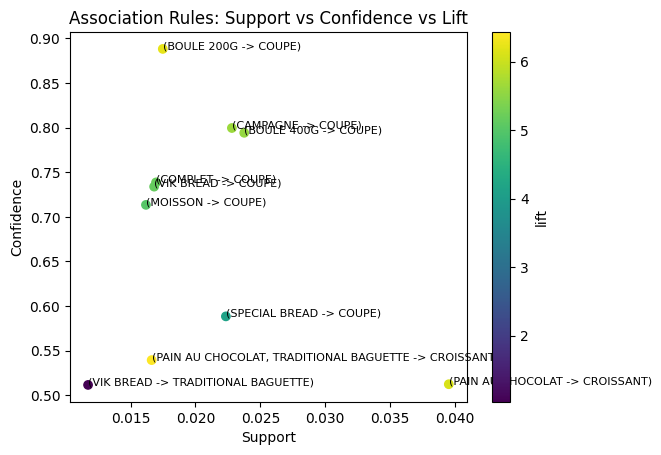

In [ ]:
# Scatter plot for example 2 association rules
scatter_plot(rules2)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


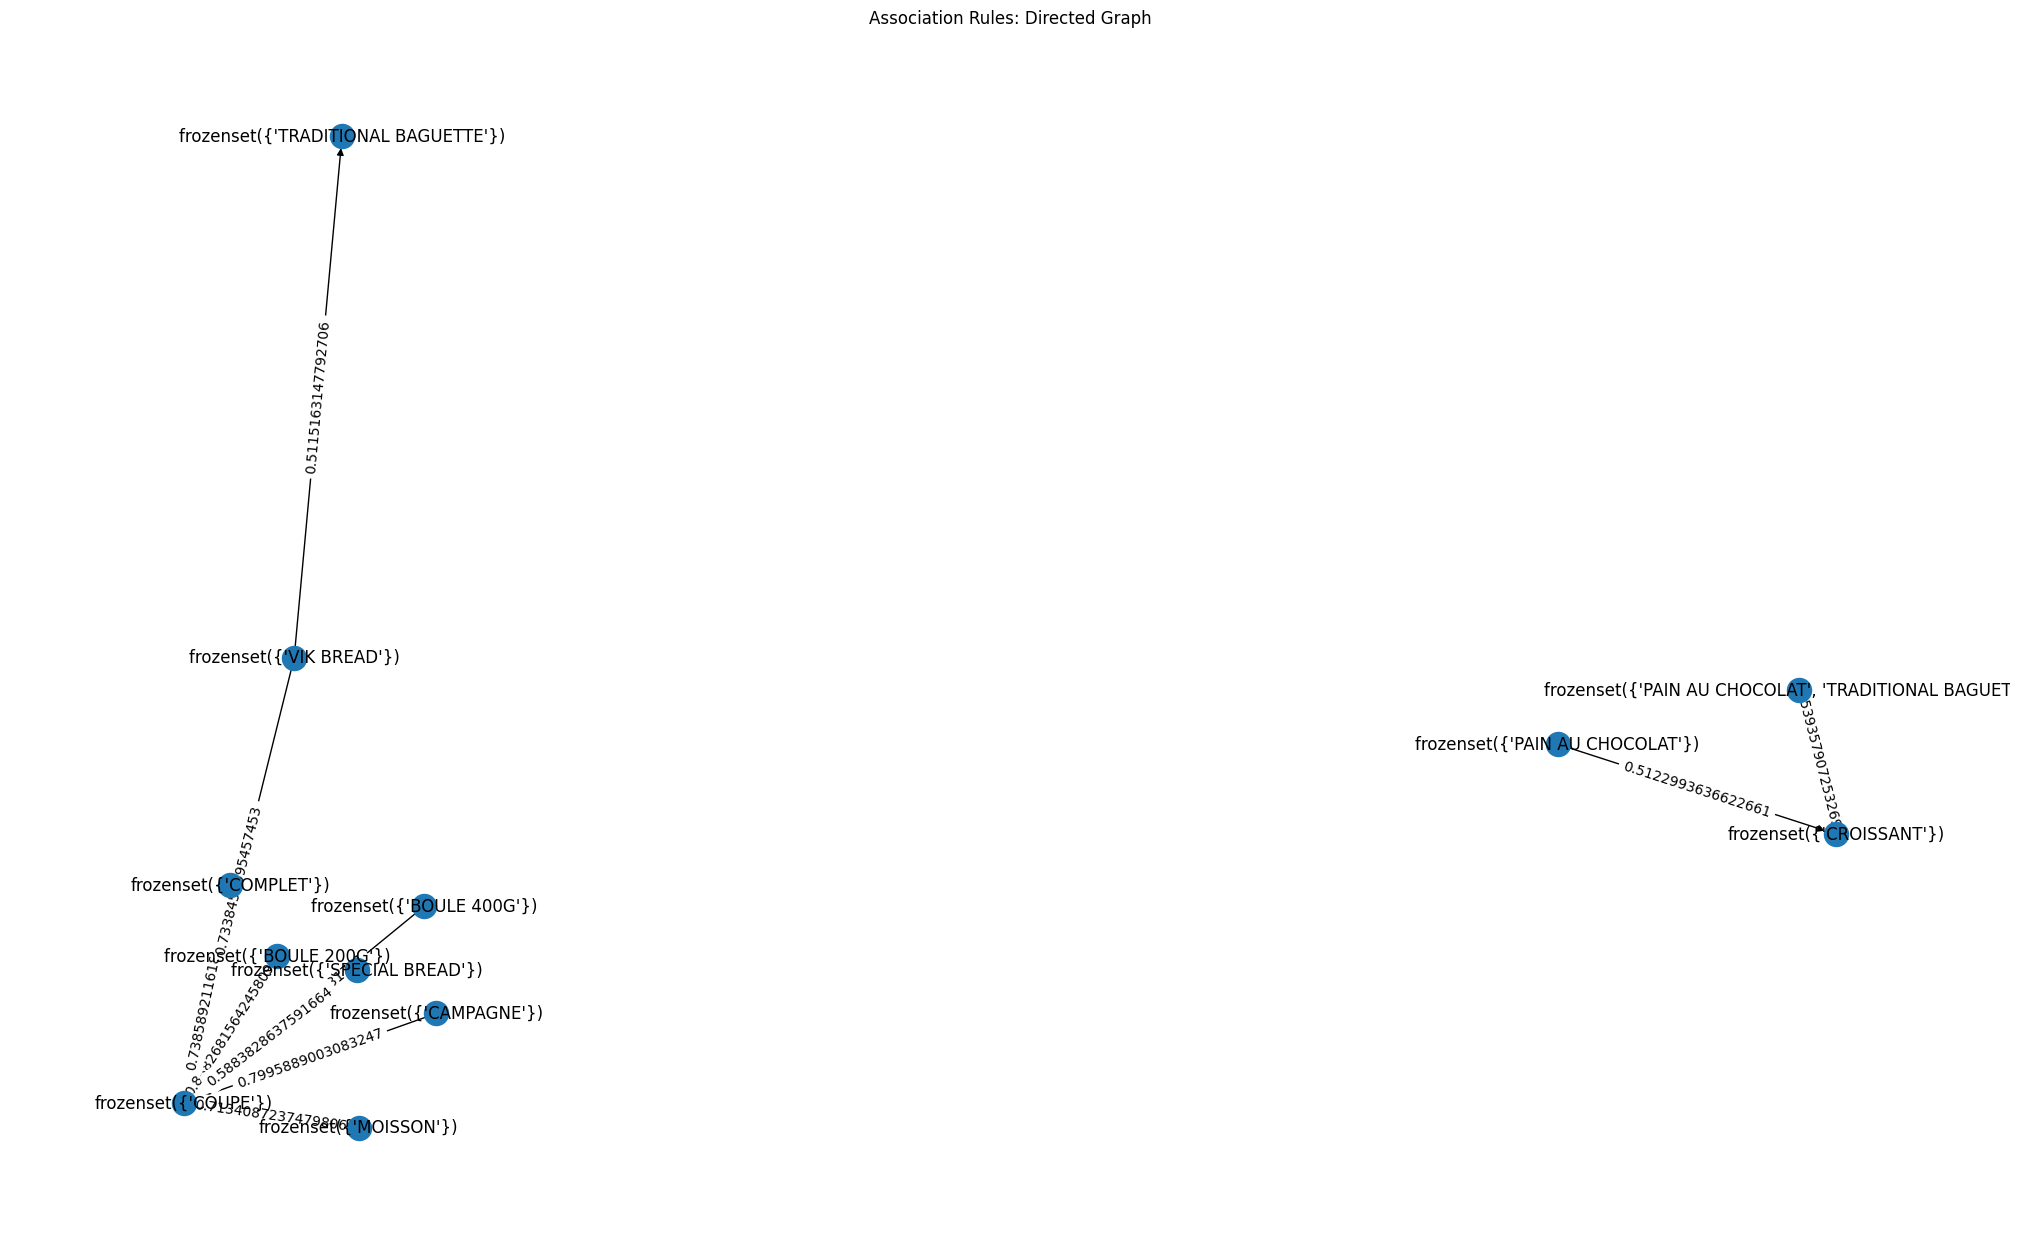

In [ ]:
# Directed graph for example 2 association rules
directed_graph(rules2)

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Load data
data = pd.read_csv('/content/Bakery sales.csv')

data['datetime'] = pd.to_datetime(data['date'] + ' ' + data['time'])
data['time_period'] = pd.cut(data['datetime'].dt.hour,
                             bins=[0, 11, 15, 23],
                             labels=['Morning', 'Noon', 'Evening'],
                             right=False)

#morning
print(data['time_period'].value_counts())
morning_data = data[data['time_period'] == 'Morning']

morning_data['group_key'] = morning_data['ticket_number'].astype(str)

grouped = morning_data.groupby('group_key')['article'].apply(list)

encoder = TransactionEncoder()
onehot = encoder.fit_transform(grouped)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

frequent_itemsets = apriori(onehot_df, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.05)

print(rules.sort_values(by='lift', ascending=False).head(10))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


time_period
Morning    112119
Noon        90652
Evening     31234
Name: count, dtype: int64


<ipython-input-38-7d63813a4a8f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morning_data['group_key'] = morning_data['ticket_number'].astype(str)


                       antecedents                    consequents  \
540      (COUPE, PAIN AU CHOCOLAT)          (CAMPAGNE, CROISSANT)   
537          (CAMPAGNE, CROISSANT)      (COUPE, PAIN AU CHOCOLAT)   
539             (CROISSANT, COUPE)   (CAMPAGNE, PAIN AU CHOCOLAT)   
538   (CAMPAGNE, PAIN AU CHOCOLAT)             (CROISSANT, COUPE)   
568         (CROISSANT, VIK BREAD)      (COUPE, PAIN AU CHOCOLAT)   
569      (COUPE, PAIN AU CHOCOLAT)         (CROISSANT, VIK BREAD)   
554      (COUPE, PAIN AU CHOCOLAT)     (CROISSANT, SPECIAL BREAD)   
553     (CROISSANT, SPECIAL BREAD)      (COUPE, PAIN AU CHOCOLAT)   
567             (CROISSANT, COUPE)  (PAIN AU CHOCOLAT, VIK BREAD)   
571  (PAIN AU CHOCOLAT, VIK BREAD)             (CROISSANT, COUPE)   

     antecedent support  consequent support   support  confidence       lift  \
540            0.009993            0.002146  0.001081    0.108197  50.416368   
537            0.002146            0.009993  0.001081    0.503817  50.416368   


In [ ]:
#noon
noon_data = data[data['time_period'] == 'Noon']

noon_data['group_key'] = noon_data['ticket_number'].astype(str)

grouped = noon_data.groupby('group_key')['article'].apply(list)

encoder = TransactionEncoder()
onehot = encoder.fit_transform(grouped)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

frequent_itemsets = apriori(onehot_df, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.05)

print(rules.sort_values(by='lift', ascending=False).head(10))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-52a2cd3051ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noon_data['group_key'] = noon_data['ticket_number'].astype(str)


                                  antecedents  \
168              (BAGUETTE, PAIN AU CHOCOLAT)   
170                               (CROISSANT)   
171                        (PAIN AU CHOCOLAT)   
167                     (BAGUETTE, CROISSANT)   
198                        (COUPE, BANETTINE)   
219                 (COUPE, PAIN AU CHOCOLAT)   
88                                (CROISSANT)   
89                         (PAIN AU CHOCOLAT)   
243                               (CROISSANT)   
242  (PAIN AU CHOCOLAT, TRADITIONAL BAGUETTE)   

                                  consequents  antecedent support  \
168                               (CROISSANT)            0.002236   
170              (BAGUETTE, PAIN AU CHOCOLAT)            0.023338   
171                     (BAGUETTE, CROISSANT)            0.022273   
167                        (PAIN AU CHOCOLAT)            0.002822   
198                                 (MOISSON)            0.002556   
219                               (CROISSANT) 

In [ ]:
#evening
evening_data = data[data['time_period'] == 'Evening']

evening_data['group_key'] = evening_data['ticket_number'].astype(str)

grouped = evening_data.groupby('group_key')['article'].apply(list)

encoder = TransactionEncoder()
onehot = encoder.fit_transform(grouped)
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)

frequent_itemsets = apriori(onehot_df, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.05)

print(rules.sort_values(by='lift', ascending=False).head(10))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-fb7a5d15298a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evening_data['group_key'] = evening_data['ticket_number'].astype(str)


                             antecedents                          consequents  \
139                        (PARIS BREST)                    (MILLES FEUILLES)   
140                    (MILLES FEUILLES)                        (PARIS BREST)   
250   (TARTELETTE, TRADITIONAL BAGUETTE)                        (PARIS BREST)   
253                        (PARIS BREST)   (TARTELETTE, TRADITIONAL BAGUETTE)   
252                         (TARTELETTE)  (PARIS BREST, TRADITIONAL BAGUETTE)   
251  (PARIS BREST, TRADITIONAL BAGUETTE)                         (TARTELETTE)   
161                        (PARIS BREST)                         (TARTELETTE)   
160                         (TARTELETTE)                        (PARIS BREST)   
117                        (PARIS BREST)                             (ECLAIR)   
118                             (ECLAIR)                        (PARIS BREST)   

     antecedent support  consequent support   support  confidence       lift  \
139            0.007764     

In [ ]:
## link analysis
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
G = nx.Graph()
for ticket_number, group in data.groupby('ticket_number'):
    items = group['article'].unique()
    for i in range(len(items)):
        for j in range(i + 1, len(items)):
            if G.has_edge(items[i], items[j]):
                G[items[i]][items[j]]['weight'] += 1
            else:
                G.add_edge(items[i], items[j], weight=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


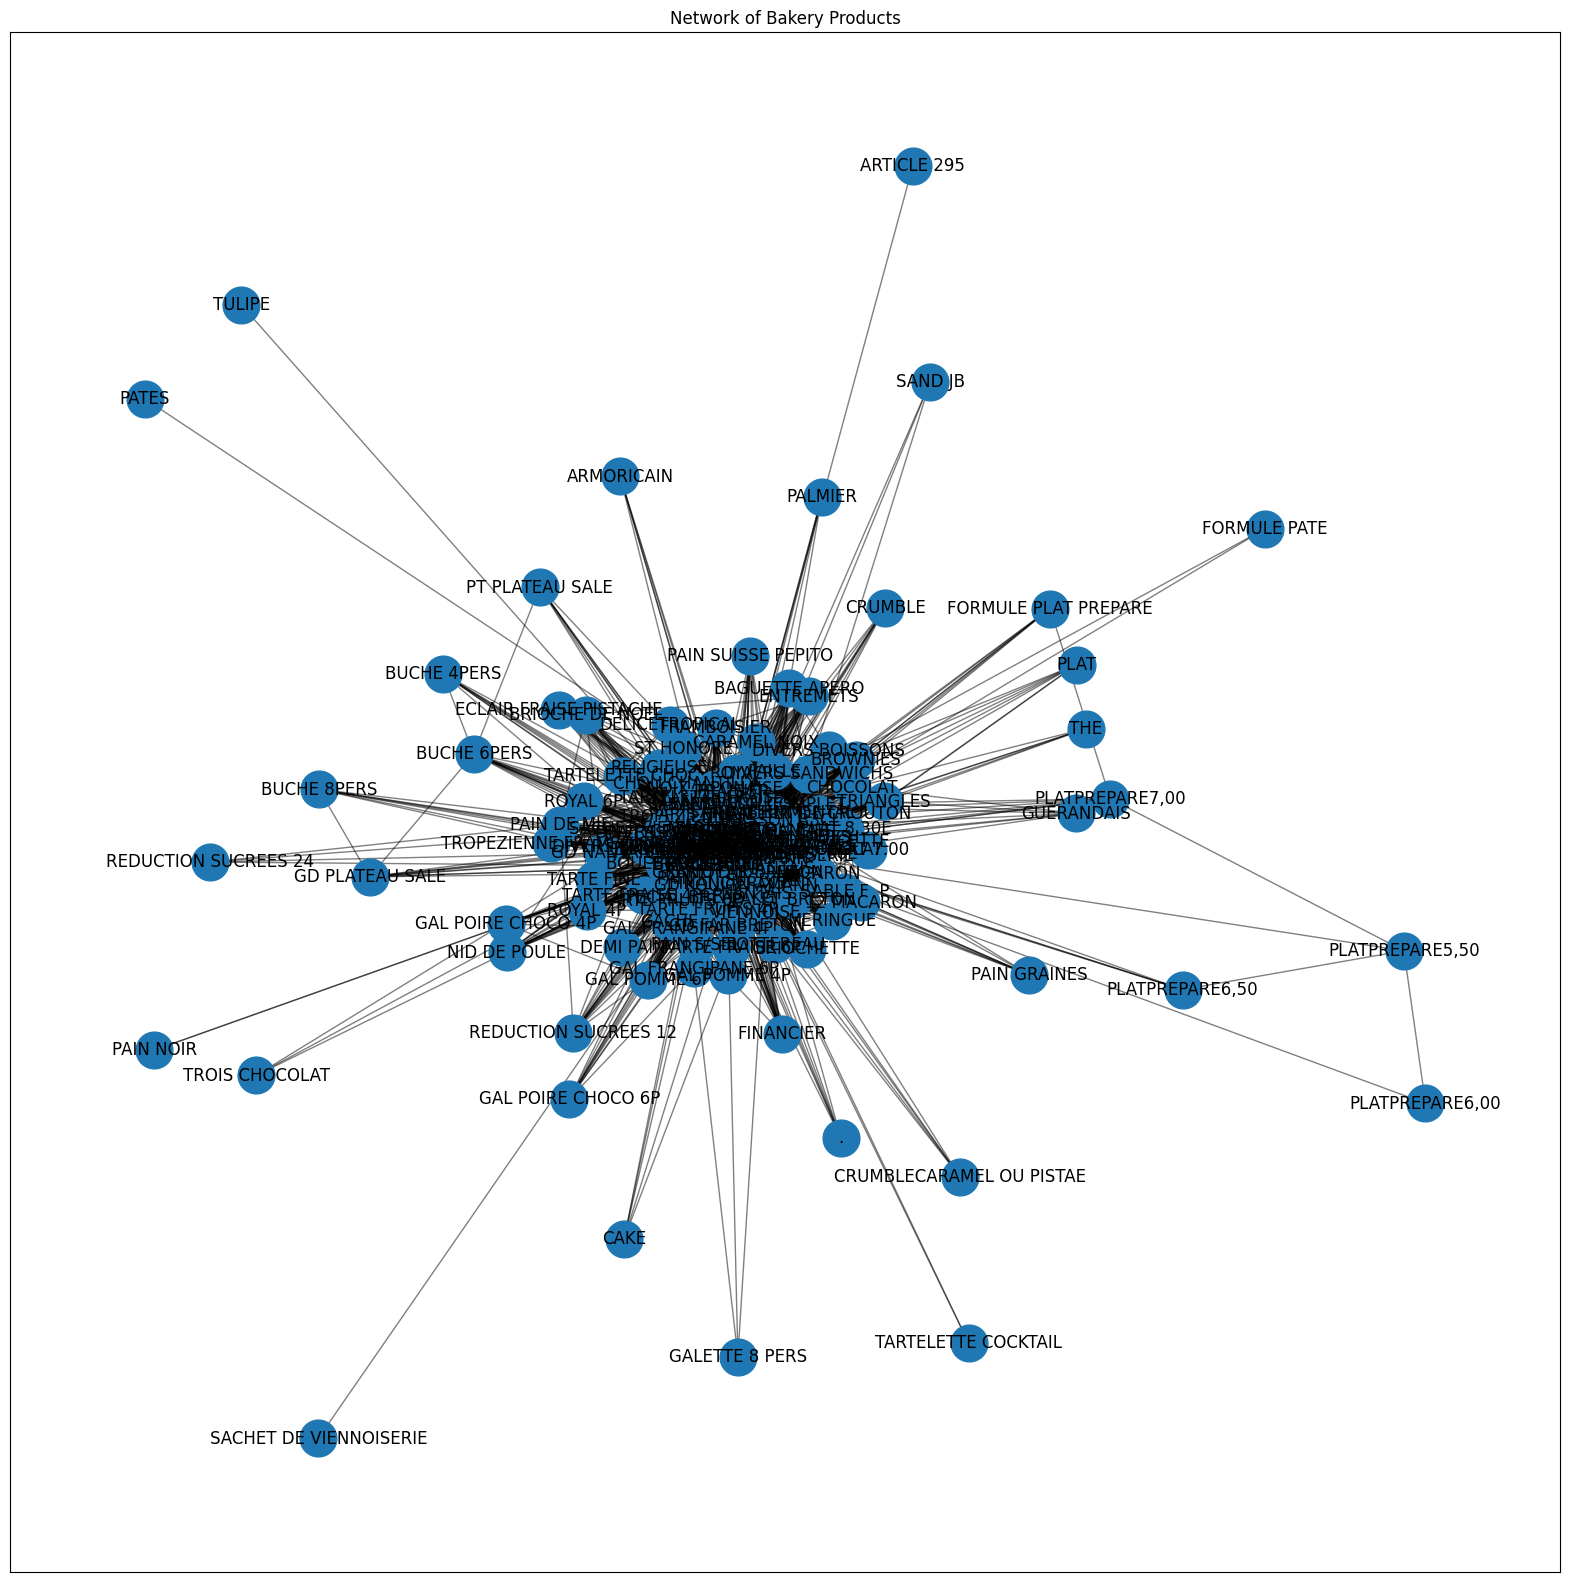

In [ ]:
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.15)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=12)
plt.title('Network of Bakery Products')
plt.show()

In [ ]:
degrees = dict(G.degree(weight='weight'))
sorted_degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
print("Top degrees:", sorted_degrees[:10])
centrality = nx.betweenness_centrality(G, weight='weight')
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("Top centrality:", sorted_centrality[:10])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top degrees: [('TRADITIONAL BAGUETTE', 46126), ('COUPE', 38507), ('CROISSANT', 21855), ('PAIN AU CHOCOLAT', 20086), ('BAGUETTE', 12797), ('BANETTE', 10863), ('SPECIAL BREAD', 7644), ('BOULE 400G', 6888), ('VIK BREAD', 6797), ('CAMPAGNE', 6535)]
Top centrality: [('TRADITIONAL BAGUETTE', 0.04578434095827403), ('SANDWICH COMPLET', 0.03201814366755598), ('SEIGLE', 0.02988392878742063), ('VIENNOISE', 0.027044052491469447), ('DIVERS SANDWICHS', 0.024187301084497074), ('TRAITEUR', 0.023373021401109008), ('TARTELETTE', 0.022813215344960728), ('PAIN CHOCO AMANDES', 0.022561806385766804), ('VIK BREAD', 0.02212225430157864), ('MOISSON', 0.02160439288445034)]
